In [1]:
# Importing necessary libraries, pandas for handling CSV files and pydot for graphing.
import pandas as pd
import numpy as np
import pydot
from IPython.display import Image, display
from collections import defaultdict

In [2]:
productions = {}
i = 0
# Reading the CFG productions from a text file.
with open("cfg.txt", "r") as f:
    for line in f:   
        line = line.rstrip('\n')
        line = line.replace('\'\'', 'eps')
        line = line.rstrip()
        if line != "":
            productions[i] = line
            i += 1
# Printing the productions read from file
productions

{0: "START -> S'",
 1: "S' -> S NL S'",
 2: "S' -> eps",
 3: "S -> ID with ( ARGS ) NL S' plant",
 4: 'ARGS -> ARG',
 5: 'ARGS -> ARG , ARGS',
 6: 'ARGS -> eps',
 7: 'ARG -> DTYPE ID',
 8: 'ARG -> DTYPE # ID',
 9: 'S -> FUNCALL',
 10: 'FUNCALL -> reap ID with ( VARS )',
 11: 'VARS -> EXPR',
 12: 'VARS -> EXPR , VARS',
 13: 'VARS -> eps',
 14: 'S -> here lies ID NL __________ NL | NL SS |__________',
 15: 'SS -> | S NL SS',
 16: 'SS -> eps',
 17: 'S -> IFPAIR',
 18: 'IFPAIR -> IFCASE rotten IFPAIR',
 19: "IFPAIR -> IFCASE rotten NL S' dispose",
 20: 'IFPAIR -> IFCASE dispose',
 21: "IFCASE -> EXPR fresh? NL S'",
 22: 'S -> kill',
 23: 'S -> skip',
 24: 'S -> supply EXPR',
 25: 'S -> sow ASIZE ID of DTYPE',
 26: 'ASIZE -> NUM',
 27: 'ASIZE -> eps',
 28: 'S -> EXPR is EXPR',
 29: "S -> harvest INIT_COND FINAL_COND STEP BLKARROW NL S' sell",
 30: 'INIT_COND -> eps',
 31: 'INIT_COND -> from EXPR is EXPR',
 32: 'FINAL_COND -> eternally',
 33: 'FINAL_COND -> until EXPR',
 34: 'STEP -> eps',
 

In [3]:
# Reading the SLR parse table from a CSV file exported from the given website
slr = pd.read_csv('slr.csv')
slr

,State,ACTION,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102
0,NaN,with,(,),plant,",",#,reap,here,lies,...,MODE,DTYPE,EXPR,UOP,BOP,NUM,STR,BLKARROW,ID,NL
1,0.0,NaN,NaN,NaN,r2,NaN,NaN,s16,s5,NaN,...,NaN,NaN,11,18,NaN,20,21,NaN,3,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
4,3.0,s28,NaN,r62,NaN,r62,s39,r62,NaN,NaN,...,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,160.0,NaN,NaN,NaN,NaN,NaN,NaN,s16,s5,NaN,...,NaN,NaN,11,18,NaN,20,21,NaN,3,NaN
162,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163
164,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Performing various preprocessing steps on the SLR parse table to generate the action table.
goto_index = np.where(slr.columns == 'GOTO')[0][0]
action_table = slr[slr.columns[:goto_index]]
action_table.columns = ['State'] + list(action_table.iloc[0].values[1:])
action_table = action_table.drop(0, axis=0)
action_table = action_table.astype(str)
action_table = action_table.astype({"State": float})
action_table = action_table.astype({"State": int})
action_table = action_table.set_index('State')
# Printing the table we use to shift between states of the parser [action table]
action_table

,with,(,),plant,",",#,reap,here,lies,__________,...,%,&&,||,sqrt,num,str,end,id,nl,$
State,,,,,,,,,,,,,,,,,,,,,
0,nan,nan,nan,r2,nan,nan,s16,s5,nan,nan,...,nan,nan,nan,nan,s24,s25,nan,s15,nan,r2
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,acc
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,s27,nan
3,s28,nan,r62,nan,r62,s39,r62,nan,nan,nan,...,s46,s47,s48,s49,r62,r62,r62,r62,r62,nan
4,nan,nan,r68,nan,r68,s39,r68,nan,nan,nan,...,s46,s47,s48,s49,r68,r68,r68,r68,r9,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,nan,nan,nan,nan,nan,nan,s16,s5,nan,nan,...,nan,nan,nan,nan,s24,s25,nan,s15,nan,nan
161,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,r14,nan
162,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,s27,nan


In [5]:
# Performing various preprocessing steps on the SLR parse table to generate the goto table.
goto_table = slr[['State'] + list(slr.columns[goto_index:])]
goto_table.columns = ['State'] + list(goto_table.iloc[0].values[1:])
goto_table= goto_table.drop(0, axis=0)
goto_table= goto_table.astype(str)
goto_table= goto_table.astype({"State": float})
goto_table = goto_table.astype({"State": int})
goto_table = goto_table.set_index('State')
# Printing the table we use to reduce between stack of the parser [goto table]
goto_table

,START,S',S,ARGS,ARG,FUNCALL,VARS,SS,IFPAIR,IFCASE,...,MODE,DTYPE,EXPR,UOP,BOP,NUM,STR,BLKARROW,ID,NL
State,,,,,,,,,,,,,,,,,,,,,
0,nan,1,2,nan,nan,4,nan,nan,6,17,...,nan,nan,11,18,nan,20,21,nan,3,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,26
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,29,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,50,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,nan,nan,162,nan,nan,4,nan,nan,6,17,...,nan,nan,11,18,nan,20,21,nan,3,nan
161,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
162,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,163


In [6]:
# Defining a basic tree class we use for constructing our parse tree.
class Tree:
    def __init__(self, ide, data, children = []):
        self.id = ide
        self.data = data
        self.children = children
    
    def add_child(self, node):
        self.children.append(node)

In [7]:
# spade_keywords = [ "sow", "with", "reap", "of", "here", "lies", "is", "harvest", "from", "until", "eternally", "every", "⚠", "fresh?", "rotten", "kill", "skip", "supply", "unearth", "bury", "engrave", "on", "stdout", "stderr", "i64", "u64", "f64", "i32", "u32", "f32", "b8", "b1", "c32", "c∞", "file", "❌", "⭕", "[", "]"]
# spade_operators = [ "+", "-", "×", "÷", "/", "&", "|", "^", "√", "=", "!", "~", "#", ">", "<", "(", ")", "←", "→", "⚠", "≥", "≤", "≠", "%", ",", "&&", "||" ]

In [8]:
# Our language is unique in the sense that it uses Unicode symbols for certain keywords and operators.
# Unfortunately for us, our graphing library and the SLR website given both do not support Unicode symbols.
# So we switch to ASCII equivalents for their sake.
special_char_dic = {}
special_char_dic["÷"] = 'div'
special_char_dic["√"] = 'sqrt'
special_char_dic["×"] = '*'
special_char_dic["→"] = 'arrow'
special_char_dic["≥"] = 'ge'
special_char_dic["≤"] = 'le'
special_char_dic["≠"] = 'ne'

In [9]:
# Importing our operators and keywords from the lexer we wrote in phase 1, also importing the tokenize function
# This is to reduce complexity of passing tokens to the parser.
from spade_tokenizer import tokenize, spade_keywords, spade_operators

In [10]:
# Loading a given test case from our test case directory. The list of tokens is printed out.
test_id = 12
tokens = tokenize('test-cases/test' + str(test_id) + '.spd')
tokens

[(1, 'SPADE_KEYWORD', 'sow'),
 (1, 'IDENTIFIER', 'apple'),
 (1, 'SPADE_KEYWORD', 'of'),
 (1, 'SPADE_KEYWORD', 'i64'),
 (1, 'NEW_LINE', '\\n'),
 (2, 'SPADE_KEYWORD', 'sow'),
 (2, 'IDENTIFIER', 'banana'),
 (2, 'SPADE_KEYWORD', 'of'),
 (2, 'SPADE_KEYWORD', 'i64'),
 (2, 'NEW_LINE', '\\n'),
 (3, 'SPADE_KEYWORD', 'sow'),
 (3, 'IDENTIFIER', 'cow'),
 (3, 'SPADE_KEYWORD', 'of'),
 (3, 'SPADE_KEYWORD', 'f32'),
 (3, 'NEW_LINE', '\\n'),
 (4, 'SPADE_KEYWORD', 'sow'),
 (4, 'IDENTIFIER', 'a'),
 (4, 'SPADE_KEYWORD', 'of'),
 (4, 'SPADE_KEYWORD', 'f32'),
 (4, 'NEW_LINE', '\\n'),
 (5, 'SPADE_KEYWORD', 'sow'),
 (5, 'IDENTIFIER', 'b'),
 (5, 'SPADE_KEYWORD', 'of'),
 (5, 'SPADE_KEYWORD', 'f32'),
 (5, 'NEW_LINE', '\\n'),
 (6, 'SPADE_KEYWORD', 'sow'),
 (6, 'IDENTIFIER', 'c'),
 (6, 'SPADE_KEYWORD', 'of'),
 (6, 'SPADE_KEYWORD', 'f32'),
 (6, 'NEW_LINE', '\\n'),
 (8, 'IDENTIFIER', 'apple'),
 (8, 'SPADE_KEYWORD', 'is'),
 (8, 'INT_CONSTANT', '1'),
 (8, 'NEW_LINE', '\\n'),
 (9, 'IDENTIFIER', 'banana'),
 (9, 'SPADE_KEY

In [11]:
# Reducing the tokens parsed into a form the CFG understands
# For example, integer and float constants are reduced to a "num" terminal that the CFG uses.
# The booleans ❌ and ⭕ are also considered as numbers.
def convert(raw):
    if raw[1] == 'SPADE_KEYWORD':
        if raw[2] == '⏵':
            return 'end'
        elif raw[2] == '❌' or raw[2] == '⭕':
            return 'num'
        return raw[2]
    elif raw[1] == 'SPADE_OPERATOR':
        return special_char_dic.get(raw[2], raw[2])
        return raw[2]
    elif raw[1] == 'IDENTIFIER':
        return 'id'
    elif raw[1] == 'NEW_LINE':
        return 'nl'
    elif raw[1] == 'INT_CONSTANT' or raw[1] == 'FLOAT_CONSTANT':
        return 'num'
    elif raw[1] == 'STRING_CONSTANT':
        return 'str'
    elif raw[2] == '$':
        return '$'

In [12]:
# Setting the SLR parse by appending the token tuples with a tuple representing "$". 
# A stack is also setup which is used by the parser.
buffer = tokens + [(None, None, "$")]
stack = ['0']
errors = set()
step = 1
graph_id = 0
action = action_table.loc[0].loc[convert(buffer[0])]
# graph_id is generated per node of the parse tree. Even the same token will be assigned multiple IDs based on
# the part of the program it is in.
while action != "acc":
    # Error handling for invalid states encountered during parsing. The parser continues if errors are found.
    # This is done by resetting the state of the stack.
    if action == 'nan':
        errors.add(buffer[0][0])
        try:
            stack.pop()
            stack.pop()
        except IndexError:
            break
    
    # Performing a SHIFT action. Adds the current node to the stack.
    # It then adds the number of the state to shift to next as well. 
    if action.startswith('s'):
        stack.append(Tree(graph_id, buffer.pop(0)[2]))
        graph_id += 1
        stack.append(action[1:])
    
    # Performing a REDUCE action. Uses one of the given productions to reduce one or more elements on the stack.
    # Also handles epsilon productions, in which case the reduction is performed with no deletions from the stack.
    elif action.startswith('r'):
        production = productions[int(action[1:])]
        # Getting LHS and RHS [removing the arrow that is only there for readability]
        lhs, rhs = production.split(' -> ')
        # Handling epsilon productions, just adds the LHS to the stack.
        if production.endswith('eps'):
            eps_node = Tree(graph_id, 'eps')
            graph_id += 1
            stack.append(Tree(graph_id, lhs, [eps_node]))
            graph_id += 1
        # Handling other productions, pops the required number of elements and then adds the LHS production back
        # The new LHS contains the popped elements as its children, they are in the order of the production rule used.
        else:
            children = []
            rhs_stack = rhs.split(' ')
            while(True):
                popped = stack.pop()
                if (isinstance(popped, Tree)):
                    children.append(popped)
                    rhs_stack.pop(0)
                    if not rhs_stack:
                        break
                    
            children.reverse()
            stack.append(Tree(graph_id, lhs, children))
            graph_id += 1
        
        # Shifting to a new state after reduction.
        new_state = goto_table.loc[int(stack[-2])].loc[stack[-1].data]
        stack.append(new_state)
    
    action = action_table.loc[int(stack[-1])].loc[convert(buffer[0])]
    step += 1
    
# Prints the lines where parse errors were detected in. 
for error in sorted(errors):
    print("Error in line {}".format(error))

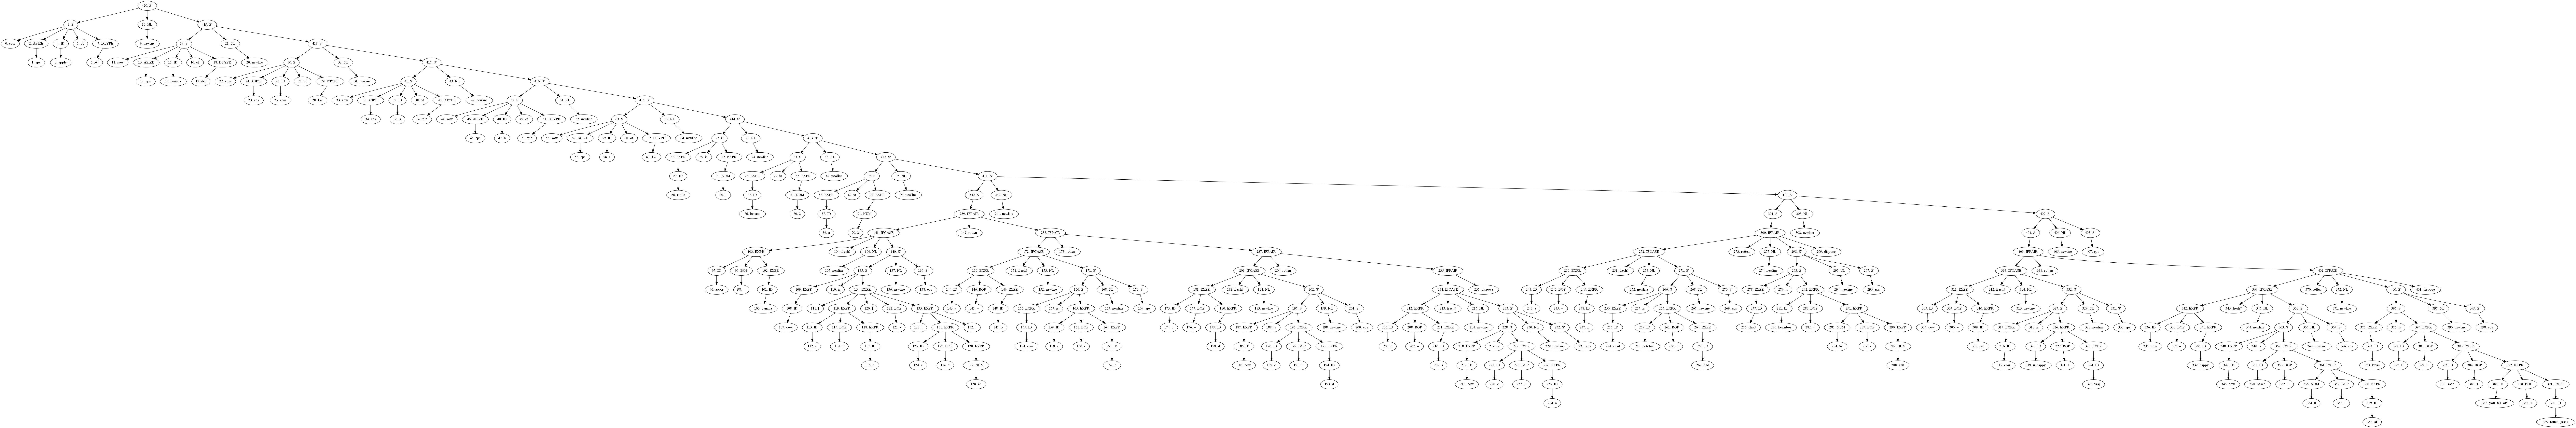

In [13]:
# Performing token substitution as discussed above.
def graph_convert(raw):
    if raw == ',':
        return 'comma'
    elif raw == '⏵':
        return 'end'
    elif raw == '❌':
        return 'False'
    elif raw == '\\n':
        return 'newline'
    else:
        return special_char_dic.get(raw, raw)

# Instantiating an empty tree object with the PyDot library.   
graph = pydot.Dot("tree")

# To add nodes to our tree, we perform a simple DFS on the tree representation, adding nodes as we hit them and then recursing on their children.
def dfs(node):
    for child in node.children:
        graph.add_node(pydot.Node(child.id, label=str(child.id) + ". " + graph_convert(child.data)))
        graph.add_edge(pydot.Edge(node.id, child.id))
        dfs(child)

# Adding the root node of the tree.
graph.add_node(pydot.Node(stack[1].id, label=str(stack[1].id) + ". " + stack[1].data))
# Performing DFS as discussed.
dfs(stack[1])

# Generating an image representation of the PyDot object and displaying it.
plt = Image(graph.create_png())
display(plt)

In [14]:
intercode_list = []

# The function that handles the generation of intermediate code lines [in terms of quadruple]
def intermediate_code(arg1,arg2,op,result):
    if(op == 'label'):
        intercode_list.append([arg1,arg2,op,result,'end'])
    elif(op == '?'):
        intercode_list.append([arg1,arg2,op,result,'ifcase'])
    elif(arg2 == 'null' and op == 'null'):
        return
    elif(arg2 == 'null'):
        intercode_list.append([arg1,arg2,op,result,'expr'])
    else:
        intercode_list.append([arg1,arg2,op,result,'expr'])

In [15]:
# After creating the parse tree, we now pick up expression and if-condition nodes in order to create quadruples and eventually
# intermediate code. We can do this by going through the tree by dfs, checking for specific sections of data, comparing their structure
# with their respective productions and obtaining a list of [arg1,arg2,op,result] for each of the statements. This list is then
# processed to visually represent what the machine will understand as intermediate code.

terms = 0
labels = 1
endlabels = 1
symbol_table = {}
quad_df = pd.DataFrame(columns = ['id1', 'arg1', 'id2', 'arg2', 'op', 'result'])

def quadrupledfs(node):
    global terms
    global labels
    global endlabels
    for child in node.children:
        quadrupledfs(child)

    if(node.children and node.children[0].data == 'sow'):
        size = 0
        if(node.children[1].children[0].data != 'eps'):
            size = node.children[1].children[0].children[0].data
        symbol_table[node.children[2].children[0].data] = (node.children[4].children[0].data if node.children[4].children[0].data != "ID" else node.children[4].children[0].children[0].data, size)
    
    #Start an if condition block
    if(node.data == 'IFCASE'):
        arg1 = node.children[0].data
        arg1id = node.children[0].id
        arg2 = str(endlabels)
        arg2id = 'null'
        op = '?'
        result = str(labels)
        labels += 1
        
        quad_df.loc[len(quad_df.index)] = [arg1id, arg1, arg2id, arg2, op, 'L' + str(result)] 
        intermediate_code(arg1, arg2, op, result)
    
    # Apply new end label
    elif(node.data == 'dispose'):
        arg1 = str(endlabels)
        arg2 = 'null'
        op = 'label'
        result = arg1
        endlabels += 1
        
        intermediate_code(arg1,arg2,op,result)
    
    elif(node.data == 'EXPR'):
        argnum = len(node.children)
        arg1id = arg1 = arg2id = arg2 = op = result = 'null'
        
        #EXPR -> ID | NUM | FUNCALL
        if(argnum == 1):
            if(node.children[0].data in ['ID','NUM','STR']):
                arg1 = node.children[0].children[0].data
                arg1id = node.children[0].children[0].id
            else:
                arg1 = node.children[0].data
                arg1id = node.children[0].id
                
            result = arg1
        
        #EXPR -> UOP EXPR
        elif(argnum == 2):
            if(node.children[1].data in ['ID','NUM','STR']):
                arg1 = node.children[1].children[0].data
                arg1id = node.children[1].children[0].id
            else:
                arg1 = node.children[1].data
                arg1id = node.children[1].id
                
            op = node.children[0].children[0].data
            result = 'expr' + str(terms)
            terms += 1
            
        #EXPR -> [ EXPR ]
        elif(argnum == 3 and node.children[0].data == '['):
            if(node.children[1].data in ['ID','NUM','STR']):
                arg1 = node.children[1].children[0].data
                arg1id = node.children[1].children[0].id
            else:
                arg1 = node.children[1].data
                arg1id = node.children[1].id

            result = arg1
            
        #EXPR -> ID BOP EXPR | NUM BOP EXPR | FUNCALL BOP EXPR
        elif(argnum == 3):
            if(node.children[0].data in ['ID','NUM','STR']):
                arg1 = node.children[0].children[0].data
                arg1id = node.children[0].children[0].id
            else:
                arg1 = node.children[0].data
                arg1id = node.children[0].id
            
            if(node.children[2].data in ['ID','NUM','STR']):
                arg2 = node.children[2].children[0].data
                arg2id = node.children[2].children[0].id
            else:
                arg2 = node.children[2].data
                arg2id = node.children[2].id

            op = node.children[1].children[0].data
            result = 'expr' + str(terms)
            terms += 1
        
        #EXPR -> [ EXPR ] BOP EXPR
        elif(argnum == 5):
            if(node.children[1].data in ['ID','NUM','STR']):
                arg1 = node.children[1].children[0].data
                arg1id = node.children[1].children[0].id
            else:
                arg1 = node.children[1].data
                arg1id = node.children[1].id
            
            if(node.children[4].data in ['ID','NUM','STR']):
                arg2 = node.children[4].children[0].data
                arg2id = node.children[4].children[0].id
            else:
                arg2 = node.children[4].data
                arg2id = node.children[4].id
                
            op = node.children[3].children[0].data
            result = 'expr' + str(terms)
            terms += 1
        
        quad_df.loc[len(quad_df.index)] = [arg1id, arg1, arg2id, arg2, op, result] 
        intermediate_code(arg1,arg2,op,result)
            
        node.children = []
        node.data = result        

In [16]:
# While the function prints the quadruples, it also handles the label generation for the if statements.
# Since if statements involve branches, we use labels and gotos to simulate the branching.
# This function handles the label generation and also exits from the if statement.
def print_intermediate():
    return_list = []
    global endlabels
    i = 0
    while i < len(intercode_list):
        if(intercode_list[i][4]=='ifcase'):
            for j in range(i):
                if(intercode_list[j][3]==intercode_list[i][0]):
                    intercode_list.insert(j+1,intercode_list[i])
                    i += 1
                    intercode_list[i] = [intercode_list[i][3],intercode_list[i][1],'label','null','label']
                    intercode_list.insert(i,[intercode_list[i][1],'null','label','null','endlabel'])
                    break
        i += 1
    
    for line in intercode_list:
        if(line[4] == 'endlabel'):
            return_list.append('goto end' + line[0])
        elif(line[4] == 'label'):
            return_list.append('L' + line[0] + ':')
        elif(line[4] == 'end'):
            return_list.append('end' + line[0] + ':')
        elif(line[4] == 'ifcase'):
            return_list.append(line[0] + ' == ❌ ' + line[2] + ' goto L' + line[3])
        elif(line[1] == 'null'):
            return_list.append(line[3] + ' := ' + line[2] + line[0])
        else:
            return_list.append(line[3] + ' := ' + line[0] + ' ' + line[2] + ' ' + line[1])
    
    return return_list

In [17]:
# Running our specialized DFS to generate quadruples from the parse tree, they are automagically put into a global dataframe. 
quadrupledfs(stack[1])
quad_df

,id1,arg1,id2,arg2,op,result
0,66,apple,null,null,null,apple
1,70,1,null,null,null,1
2,76,banana,null,null,null,banana
3,80,2,null,null,null,2
4,86,a,null,null,null,a
...,...,...,...,...,...,...
57,373,kevin,null,null,null,kevin
58,389,touch_grass,null,null,null,touch_grass
59,385,you_fell_off,391,touch_grass,+,expr19
60,381,ratio,392,expr19,+,expr20


In [18]:
# Prints the intermediate quadruples, using the print_intemediate() function as discussed above.
intermediate = print_intermediate()
intermediate

['expr0 := apple = banana',
 'expr0 == ❌ ? goto L1',
 'expr1 := a + b',
 'expr2 := c ^ 45',
 'expr3 := expr1 - expr2',
 'goto end1',
 'L1:',
 'expr4 := a = b',
 'expr4 == ❌ ? goto L2',
 'expr5 := a - b',
 'goto end1',
 'L2:',
 'expr6 := c = d',
 'expr6 == ❌ ? goto L3',
 'expr7 := c + d',
 'goto end1',
 'L3:',
 'expr8 := c = a',
 'expr8 == ❌ ? goto L4',
 'expr9 := c + a',
 'goto end1',
 'L4:',
 'end1:',
 'expr10 := a = x',
 'expr10 == ❌ ? goto L5',
 'expr11 := notchad + bad',
 'goto end2',
 'L5:',
 'expr12 := 69 - 420',
 'expr13 := kevinboi + expr12',
 'end2:',
 'expr14 := cow = sad',
 'expr14 == ❌ ? goto L6',
 'expr15 := unhappy + vraj',
 'goto end3',
 'L6:',
 'expr16 := cow = happy',
 'expr16 == ❌ ? goto L7',
 'expr17 := 0 - af',
 'expr18 := based + expr17',
 'goto end3',
 'L7:',
 'expr19 := you_fell_off + touch_grass',
 'expr20 := ratio + expr19',
 'expr21 := L + expr20',
 'end3:']

In [19]:
# Writes the generated intermediate code to a file.
with open('test-cases/test' + str(test_id) + '.shvl', 'w', encoding = "utf-8") as f:
    for item in intermediate:
        f.write("%s\n" % item)

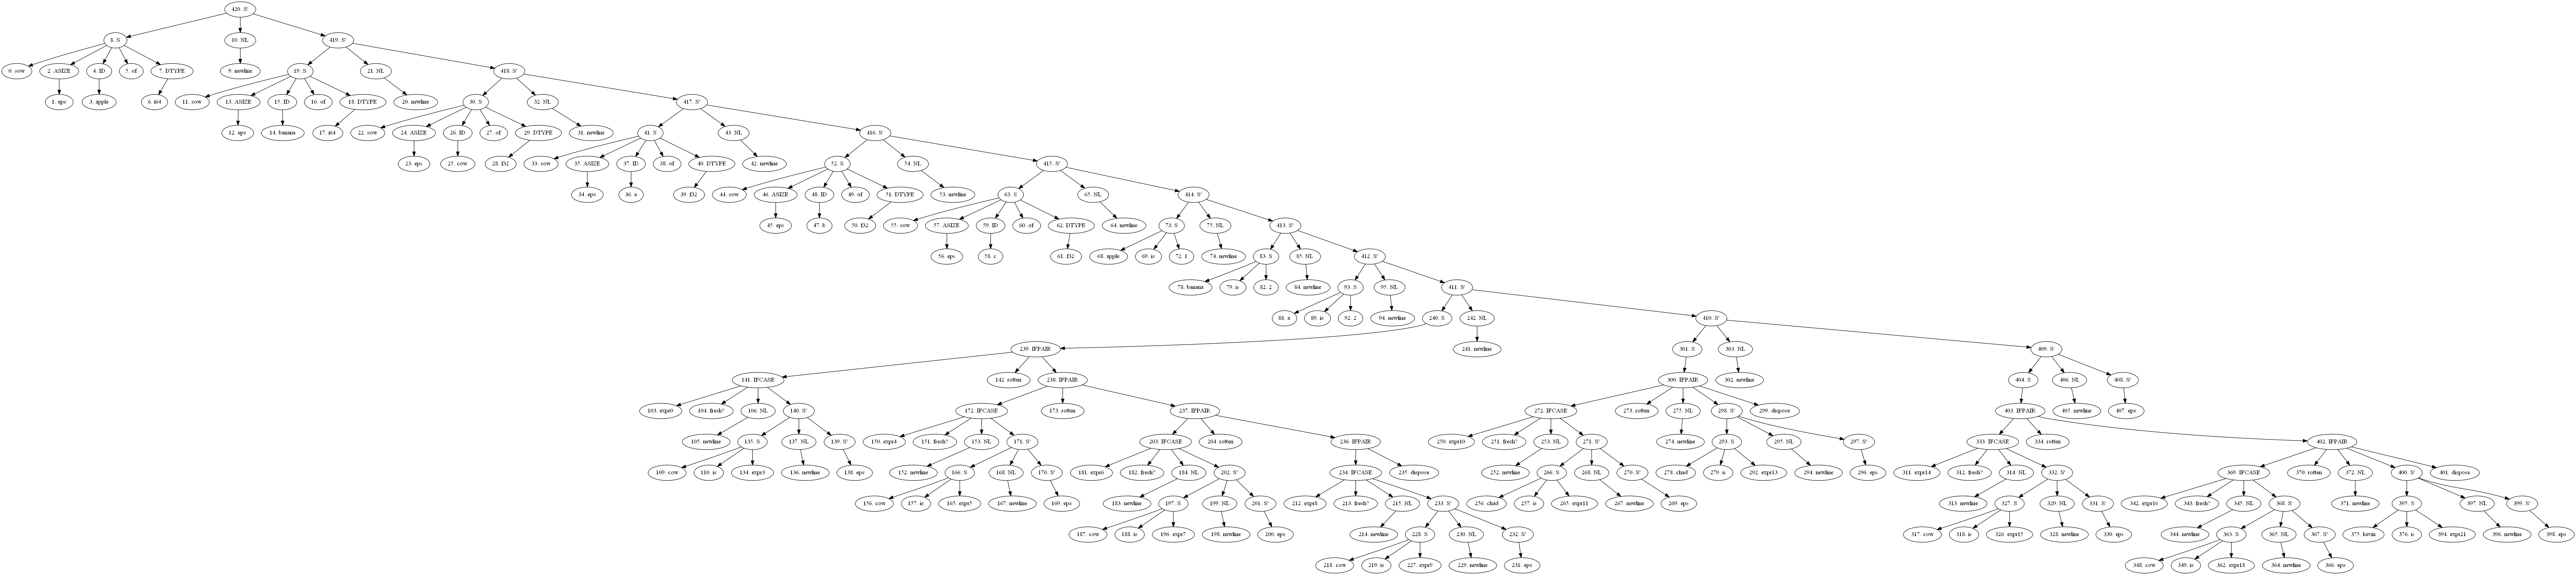

In [20]:
# Printing the parse tree once more, but with the expression reduced.
graph = pydot.Dot('tree')
graph.add_node(pydot.Node(stack[1].id, label=str(stack[1].id) + ". " + stack[1].data))
dfs(stack[1])
plt = Image(graph.create_png())
display(plt)

In [21]:
# A symbol table was generated during the ICG phase, it takes it account custom data types [structs and arrays]
symbol_table

{'apple': ('i64', 0),
 'banana': ('i64', 0),
 'cow': ('f32', 0),
 'a': ('f32', 0),
 'b': ('f32', 0),
 'c': ('f32', 0)}